# 1. Importing Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE

# 2. Data Preprocessing

## 2.1 Description 

In [157]:
# loading data
df = pd.read_csv('data.csv')

# Aperçu des 5 premières lignes
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [76]:
# Infos de base
df.info()

# Statistiques descriptives
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


## 2.2 Handling Missing Values

In [158]:
# Check for non-numeric values in your dataset
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_cols:
    print(f"Non-numeric values in column '{col}':")
    print(df[col].unique())  # Print unique values in non-numeric columns

Non-numeric values in column 'timestamp':
['2016-01-11 17:00:00' '2016-01-11 17:10:00' '2016-01-11 17:20:00' ...
 '2016-11-03 00:50:00' '2016-11-04 13:20:00' '2016-12-01 15:50:00']
Non-numeric values in column 'equipment_energy_consumption':
['60.0' '50.0' nan '70.0' '230.0' '580.0' '430.0' '250.0' '100.0' '90.0'
 '80.0' '140.0' '120.0' '190.0' '110.0' '400.0' '390.0' '240.0' '40.0'
 '30.0' '310.0' '380.0' '370.0' '20.0' '-110.0' '260.0' '500.0' '450.0'
 '220.0' '170.0' '290.0' '130.0' '200.0' '210.0' '-50.0' '-20.0'
 '-944.5664110012307' '350.0' '300.0' '-400.0' '340.0' '150.0' '330.0'
 '420.0' '520.0' '360.0' '-270.0' '-30.0' '180.0' '550.0' '690.0' '620.0'
 '610.0' '490.0' '410.0' '320.0' '270.0' '740.0' '910.0' '510.0' '790.0'
 '1139.9856929495108' '-40.0' 'error' '460.0' '160.0' '480.0' '280.0'
 '-220.0' '560.0' '1080.0' '750.0' '???' '470.0' '440.0' '-80.0' '800.0'
 '-790.0' '540.0' '530.0' 'check' '660.0' '630.0' '600.0' '10.0' '570.0'
 '830.0' '1070.0' '890.0' '590.0' '-1139.98

In [159]:
# Replace 'error', 'unknown', etc., with NaN
df.replace(['error', 'unknown', 'check', '???'], np.nan, inplace=True)


In [160]:
# Display percentage of missing values
missing = df.isnull().mean().sort_values(ascending=False) * 100
missing[missing > 0]

zone1_temperature               5.629709
zone2_temperature               5.475470
equipment_energy_consumption    5.410215
zone1_humidity                  5.267841
zone9_humidity                  5.267841
zone3_humidity                  5.208519
zone2_humidity                  5.143264
lighting_energy                 5.125467
zone8_temperature               5.030551
zone6_temperature               5.030551
zone6_humidity                  5.024619
atmospheric_pressure            4.994958
zone5_temperature               4.971229
wind_speed                      4.911906
random_variable1                4.900042
dew_point                       4.900042
random_variable2                4.888177
zone4_temperature               4.840719
visibility_index                4.834787
outdoor_temperature             4.781396
zone7_humidity                  4.775464
zone3_temperature               4.757667
zone5_humidity                  4.751735
outdoor_humidity                4.739871
zone7_temperatur

In [161]:
total_missing = df.isnull().sum().sum()
print(f"Total number of missing values: {total_missing}")

Total number of missing values: 23465


Strategy:

- For numeric columns: we Fill with median 
- For categorical columns : we Fill them with most frequent value

In [162]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
num_imputer = SimpleImputer(strategy="median")
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

    # Categorical columns: mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

    # 3. Remove duplicates
df = df.drop_duplicates()


In [163]:
total_missing = df.isnull().sum().sum()
print(f"Total number of missing values: {total_missing}")

Total number of missing values: 0


## 2.3 Handling Outliers

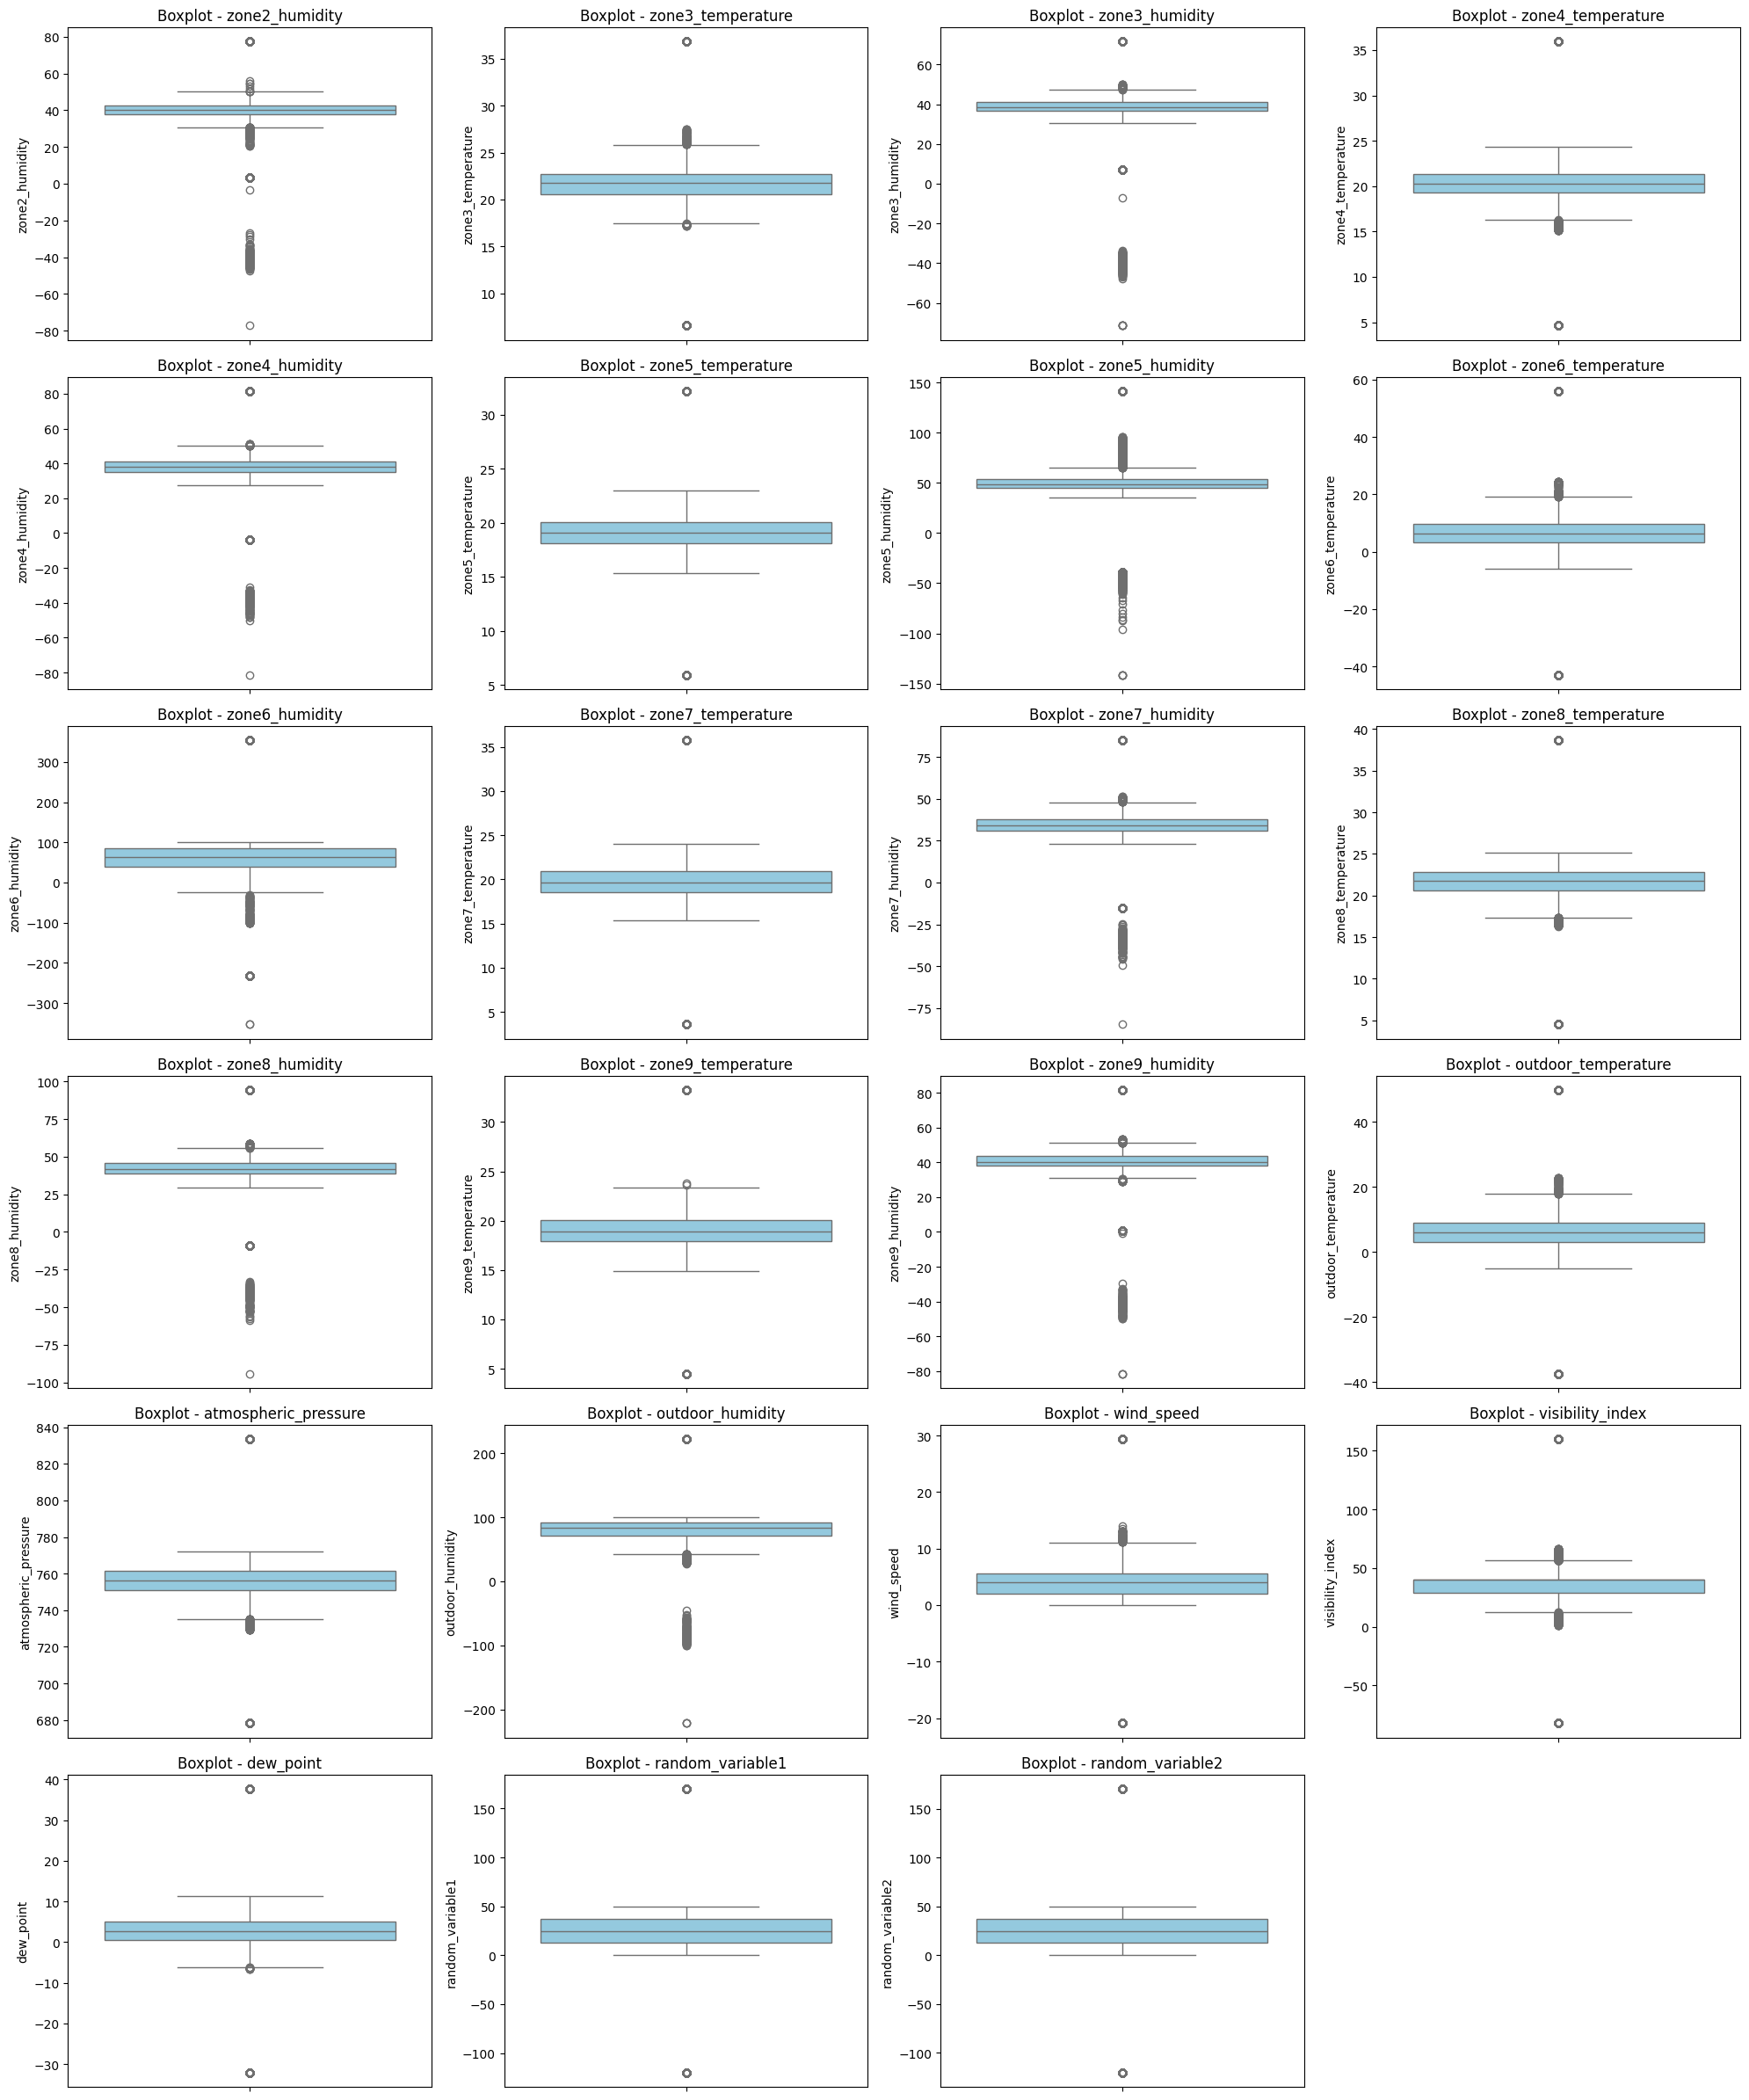

In [164]:
def plot_outliers(df, numeric_cols, max_cols=4):
    """
    Plots boxplots for numerical features to visualize outliers.

    Parameters:
        df (pd.DataFrame): The dataset
        numeric_cols (list): List of numerical column names
        max_cols (int): Max number of plots per row
    """
    num_plots = len(numeric_cols)
    num_rows = (num_plots + max_cols - 1) // max_cols
    plt.figure(figsize=(5 * max_cols, 4 * num_rows))

    for i, col in enumerate(numeric_cols):
        plt.subplot(num_rows, max_cols, i + 1)
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(f'Boxplot - {col}')
        plt.tight_layout()

    plt.show()

# Example usage
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plot_outliers(df, numeric_cols)

- Remove outliers: If outliers are extreme and likely errors.
- Cap outliers: If outliers represent valid extreme cases but shouldn't dominate.
- Impute outliers: If outliers are important but we want to limit their effect.
- Log transformation: If the data is highly skewed and we need to reduce variance caused by outliers.
- Robust models: If we’re using models that can handle outliers naturally.

In [165]:
def remove_all_outliers(df, numeric_cols, threshold=1.5):
    """
    Removes rows containing outliers based on the IQR method.
    
    Parameters:
        df (pd.DataFrame): The dataset
        numeric_cols (list): List of numeric column names
        threshold (float): The multiplier for IQR to define outliers (default: 1.5)
    
    Returns:
        pd.DataFrame: DataFrame with all outliers removed
    """
    # Loop through each numerical column and remove rows with outliers
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - threshold * IQR
        upper = Q3 + threshold * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    
    return df

# Example usage
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_cleaned = remove_all_outliers(df, numeric_cols)

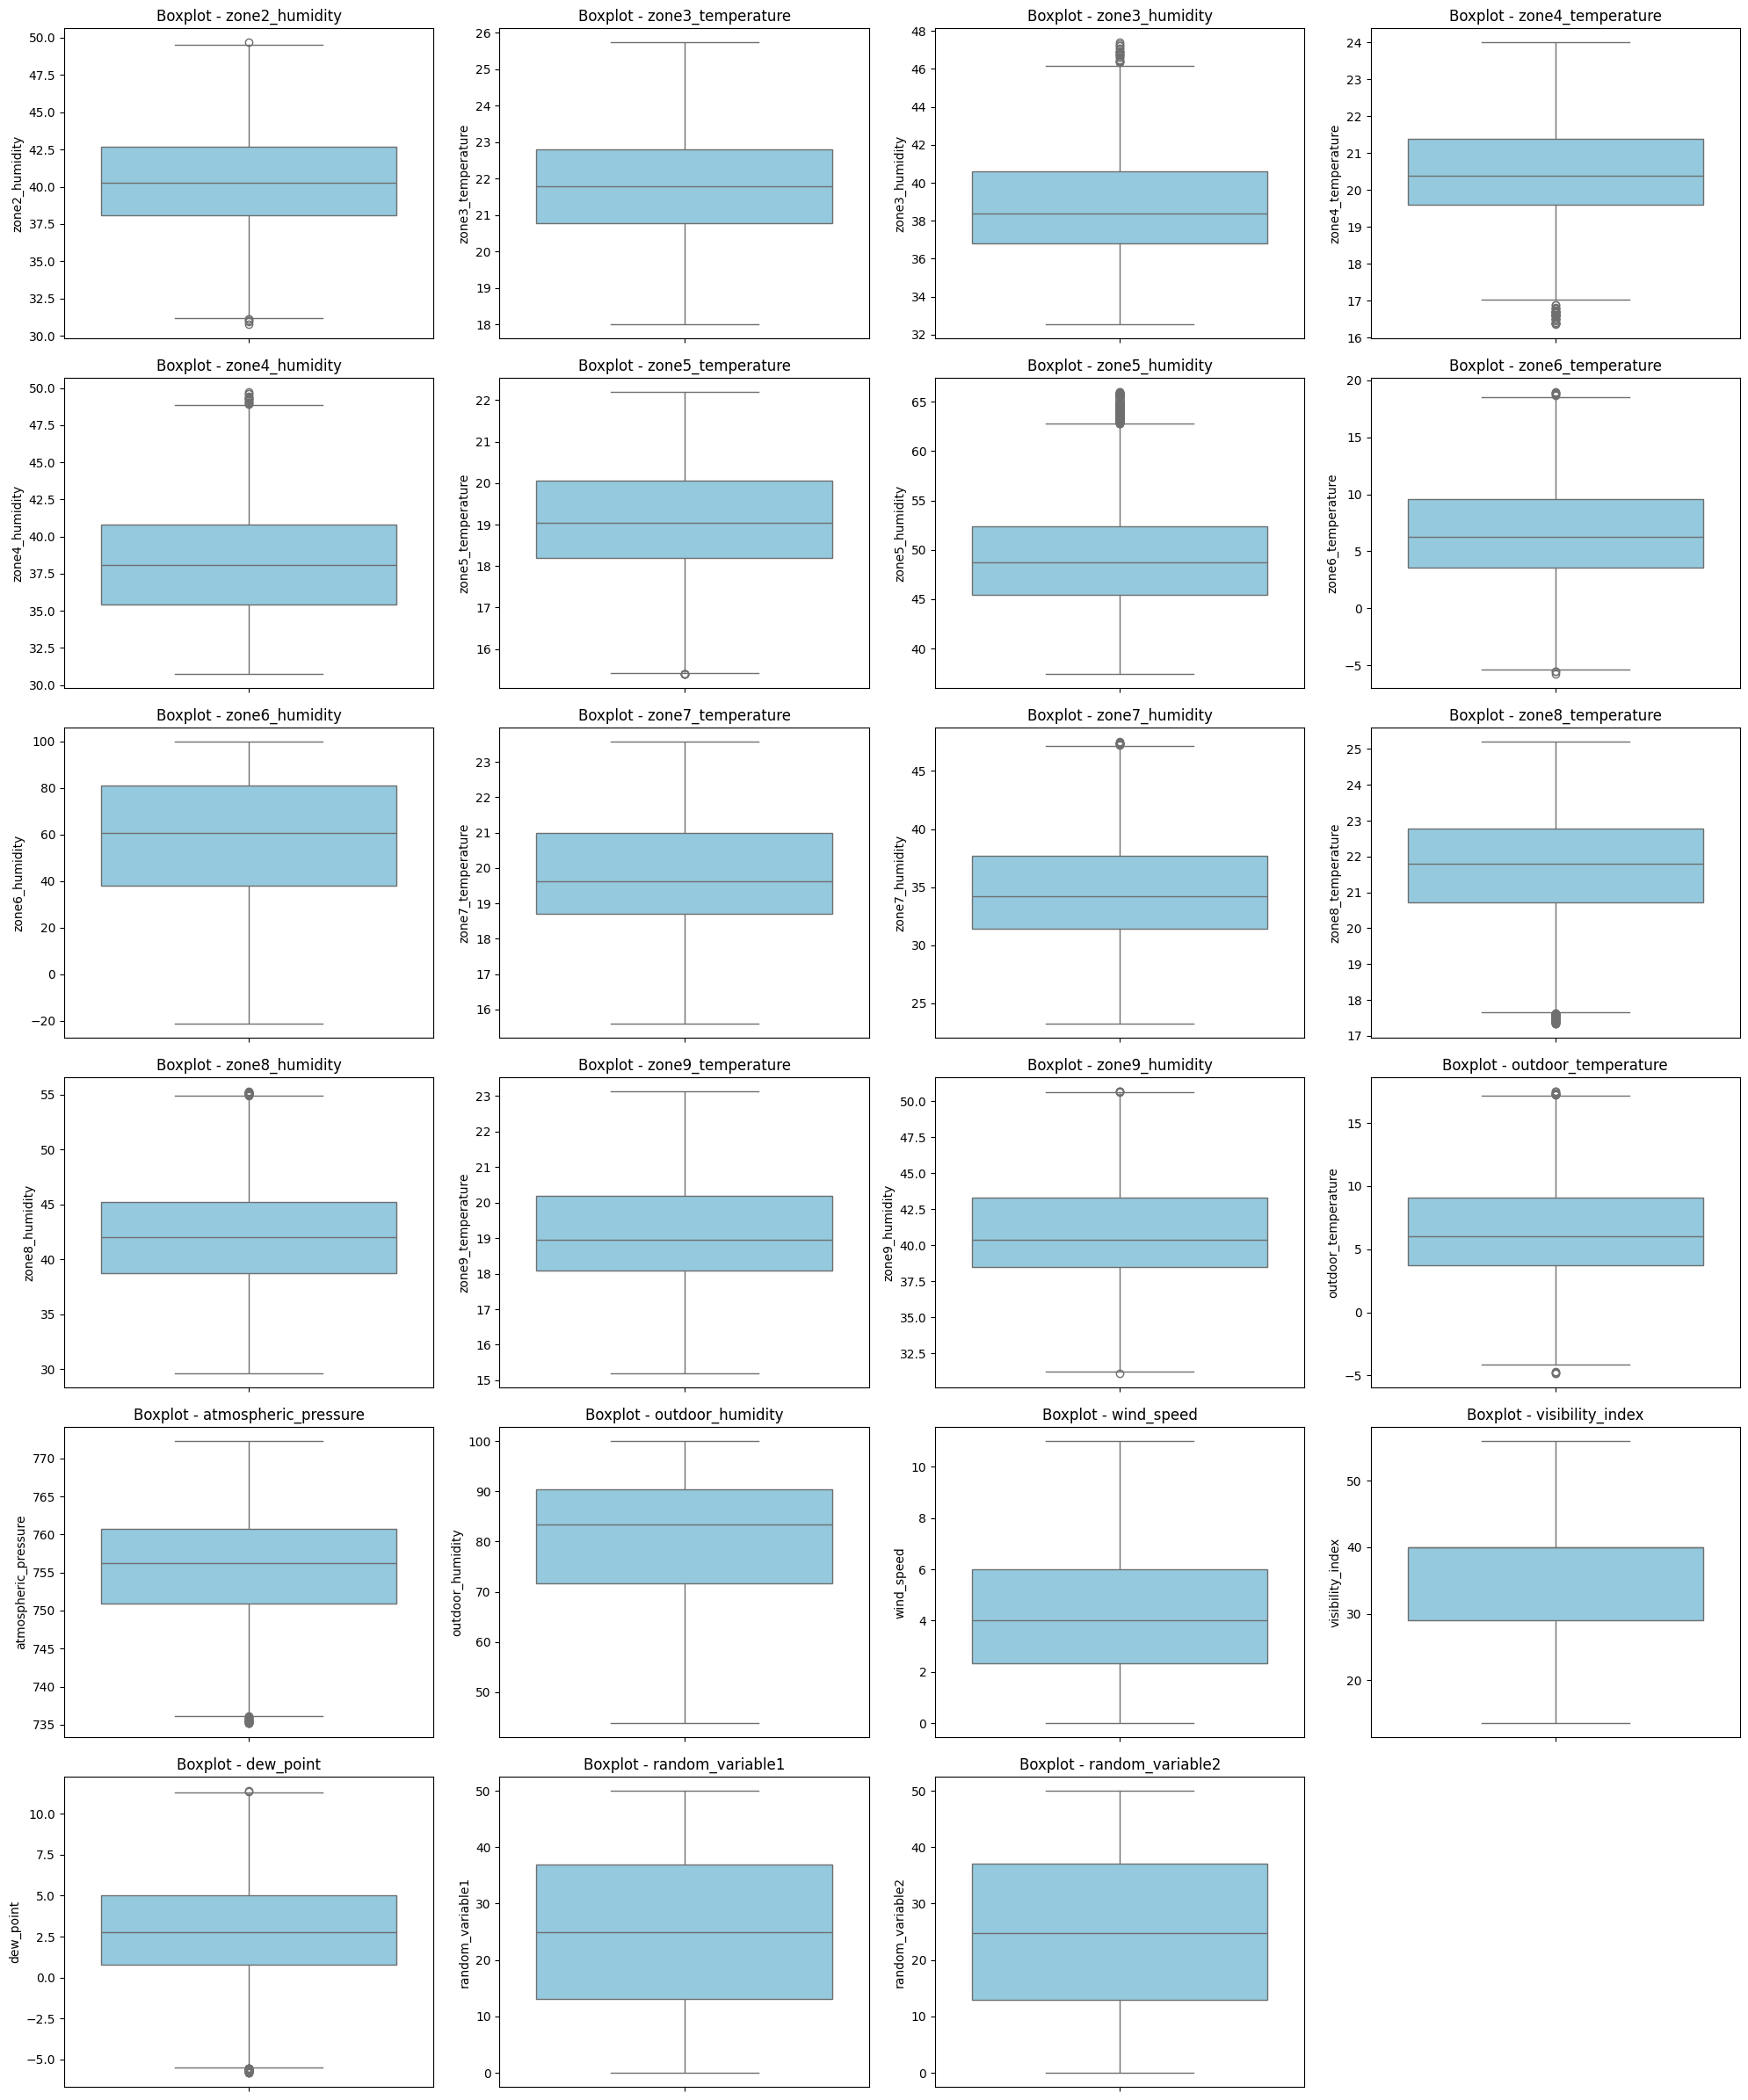

In [166]:
def plot_outliers(df, numeric_cols, max_cols=4):
    """
    Plots boxplots for numerical features to visualize outliers.

    Parameters:
        df (pd.DataFrame): The dataset
        numeric_cols (list): List of numerical column names
        max_cols (int): Max number of plots per row
    """
    num_plots = len(numeric_cols)
    num_rows = (num_plots + max_cols - 1) // max_cols
    plt.figure(figsize=(5 * max_cols, 4 * num_rows))

    for i, col in enumerate(numeric_cols):
        plt.subplot(num_rows, max_cols, i + 1)
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(f'Boxplot - {col}')
        plt.tight_layout()

    plt.show()

# Example usage
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plot_outliers(df_cleaned, numeric_cols)

## 2.4 Correlation 

In [98]:
corr_matrix = df_cleaned.corr()
corr_matrix['equipment_energy_consumption'].sort_values(ascending=False)

equipment_energy_consumption    1.000000
hour                            0.100503
zone6_temperature               0.059399
zone3_temperature               0.058367
lighting_energy                 0.044691
zone8_temperature               0.043179
outdoor_temperature             0.041029
zone4_temperature               0.038841
zone2_temperature               0.031852
zone7_temperature               0.030328
wind_speed                      0.028132
zone9_temperature               0.024197
zone1_humidity                  0.020419
zone1_temperature               0.019117
zone3_humidity                  0.015553
visibility_index                0.015063
zone5_temperature               0.009389
minute                          0.003665
zone4_humidity                  0.001911
dew_point                      -0.007715
day                            -0.009242
month                          -0.010364
random_variable2               -0.015735
atmospheric_pressure           -0.017182
zone2_humidity  

to Improve our Model:
- Remove Features with Low or Negative Correlation:
    For example, year, month, day, zone5_temperature, and humidity columns (zone1_humidity, zone3_humidity) may not be useful for predicting equipment_energy_consumption based on correlation alone.
- Focus on High Correlation Features:
    Retain features like hour, zone6_temperature, lighting_energy, zone8_temperature, etc., as they seem to have a positive correlation with the target.

and then we can :
- Use RFE (Recursive Feature Elimination) to automatically select the most important features.
- Or, manually drop less relevant features based on correlation analysis.

## 2.4 Data Normalization

# 3. Model Development

## 3.1 Split the Data

In [ ]:
# Example: Extract time-based features from timestamp
df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])

df_cleaned['hour'] = df_cleaned['timestamp'].dt.hour
df_cleaned['day'] = df_cleaned['timestamp'].dt.day
df_cleaned['month'] = df_cleaned['timestamp'].dt.month
df_cleaned['year'] = df_cleaned['timestamp'].dt.year
df_cleaned['minute'] = df_cleaned['timestamp'].dt.minute


In [150]:
df_cleaned.drop(columns=['timestamp'], inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = df_cleaned[['hour', 'day', 'year','minute','dayofweek', 'month', 'zone6_temperature', 'zone3_temperature', 'lighting_energy', 
          'zone8_temperature', 'outdoor_temperature', 'zone4_temperature']]
y = df_cleaned['equipment_energy_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['weekday'] not in index"

## 3.2 Model Selection

In [152]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')


MAE: 69.73279924530272
MSE: 25234.395997658212
R2: 0.03412343812479346
